In [1]:
# imports
from pathlib import Path
import pandas as pd
import numpy as np

# geoviz
import geoviews as gv
import geoviews.feature as gf
from geoviews import dim, opts

# boxplot
import matplotlib.pyplot as plt
from matplotlib import colormaps
import hvplot.pandas

# heatmap
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
# set pandas to display all rows by default for manual review
pd.set_option("display.max_rows", None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [4]:
# create dataframe from previously cleaned CSV file
inflation_df = pd.read_csv("inflation_data.csv", index_col=["Country Name"])

# preview data
inflation_df.head(7)

,latitude,longitude,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,41.153332,20.168331,0.484003,2.280019,2.366582,2.370728,2.932682,3.320871,2.266922,3.626047,...,1.937621,1.625865,1.896174,1.275432,1.986661,2.028060,1.411091,1.620887,2.041472,6.725203
Algeria,28.033886,1.659626,4.268954,3.961800,1.382447,2.311499,3.678996,4.858591,5.737060,3.911062,...,3.254239,2.916927,4.784447,6.397695,5.591116,4.269990,1.951768,2.415131,7.226063,9.265516
Antigua and Barbuda,17.060816,-61.796428,1.993531,2.030078,2.098752,1.787785,1.416053,5.333806,-0.550160,3.370025,...,1.059498,1.089442,0.968993,-0.489438,2.432488,1.207158,1.431356,0.625990,2.062996,7.531078
Armenia,40.069099,45.038189,4.721553,6.961261,0.638928,2.892357,4.407361,8.949953,3.406767,8.176361,...,5.789668,2.981309,3.731691,-1.403608,0.969553,2.520234,1.443447,1.211436,7.184836,8.640911
Australia,-25.274398,133.775136,2.732596,2.343255,2.691832,3.555288,2.327611,4.350299,1.771117,2.918340,...,2.449889,2.487923,1.508367,1.276991,1.948647,1.911401,1.610768,0.846906,2.863910,6.594097
Austria,47.516231,14.550072,1.355554,2.061206,2.299138,1.441549,2.168555,3.215950,0.506309,1.813534,...,2.000156,1.605812,0.896563,0.891592,2.081269,1.998380,1.530896,1.381911,2.766667,8.546870
Azerbaijan,40.143105,47.576927,2.233865,6.708930,9.679507,8.328925,16.699755,20.849087,1.457048,5.726872,...,2.415717,1.373442,4.027686,12.443375,12.935918,2.268547,2.610572,2.759809,6.650299,13.852259


In [5]:
# create list of G7 countries
g_seven = ["Canada", "France", "Germany", "Italy", "Japan", "United Kingdom", "United States"]

# isolate G7 countries in df
inflation_g7_df = inflation_df.loc[g_seven, :]

inflation_g7_df

,latitude,longitude,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Canada,56.130366,-106.346771,2.758563,1.857259,2.213552,2.002025,2.138384,2.370271,0.299467,1.776872,...,0.938292,1.906636,1.125241,1.428760,1.596884,2.268226,1.949269,0.717000,3.395193,6.802801
France,46.227638,2.213749,2.098472,2.142090,1.745869,1.675124,1.487998,2.812862,0.087620,1.531123,...,0.863715,0.507759,0.037514,0.183335,1.032283,1.850815,1.108255,0.476499,1.642331,5.222367
Germany,51.165691,10.451526,1.034222,1.665737,1.546911,1.577426,2.298344,2.628380,0.312739,1.103810,...,1.504723,0.906794,0.514426,0.491747,1.509495,1.732169,1.445660,0.144878,3.066667,6.872574
Italy,41.871940,12.567380,2.672556,2.206737,1.985293,2.090844,1.829741,3.347833,0.774768,1.525516,...,1.219993,0.241047,0.038790,-0.094017,1.226533,1.137488,0.611247,-0.137708,1.873783,8.201290
Japan,36.204824,138.252924,-0.256542,-0.008573,-0.282946,0.249355,0.060039,1.380079,-1.352837,-0.728243,...,0.335038,2.759227,0.795280,-0.127259,0.484200,0.989095,0.468776,-0.024996,-0.233353,2.497703
United Kingdom,55.378051,-3.435973,1.376500,1.390398,2.089136,2.455662,2.386562,3.521409,1.961732,2.492655,...,2.291667,1.451120,0.368047,1.008417,2.557756,2.292840,1.738105,0.989487,2.518371,7.922049
United States,37.090240,-95.712891,2.270095,2.677237,3.392747,3.225944,2.852672,3.839100,-0.355546,1.640043,...,1.464833,1.622223,0.118627,1.261583,2.130110,2.442583,1.812210,1.233584,4.697859,8.002800


## Geovisualization (Holoviews)

In [6]:
# map of 2022 inflation rate
inflation_2022_df = inflation_g7_df[["latitude", "longitude", "2022"]]

map = inflation_2022_df.hvplot.points(
    "longitude",
    "latitude",
    geo=True,
    tiles="OSM",
    xlabel="longitude",
    ylabel="latitude",
    color="2022",
    clim=(0,10),
    line_color="black",
    frame_width=800,
    frame_height=400,
    cmap=["#ffffff", "#ff9980", "#ff3300", "#801a00", "#330a00"],
    title="2022 Inflation Rate (%) in G7 Countries",
    hover_cols=["Country Name"],
    size=300
)

hvplot.save(map, "high_inflation_world_map.html")

map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (2022,Country Name)

## Notched Box Plot (Matplotlib)

In [9]:
# transpose dataframe and eliminate lat/lon
inflation_g7_df_no_lat_lon = inflation_g7_df.iloc[:,2:].T

inflation_g7_df_no_lat_lon.head(3)

Country Name,Canada,France,Germany,Italy,Japan,United Kingdom,United States
2003,2.758563,2.098472,1.034222,2.672556,-0.256542,1.376500,2.270095
2004,1.857259,2.142090,1.665737,2.206737,-0.008573,1.390398,2.677237
2005,2.213552,1.745869,1.546911,1.985293,-0.282946,2.089136,3.392747


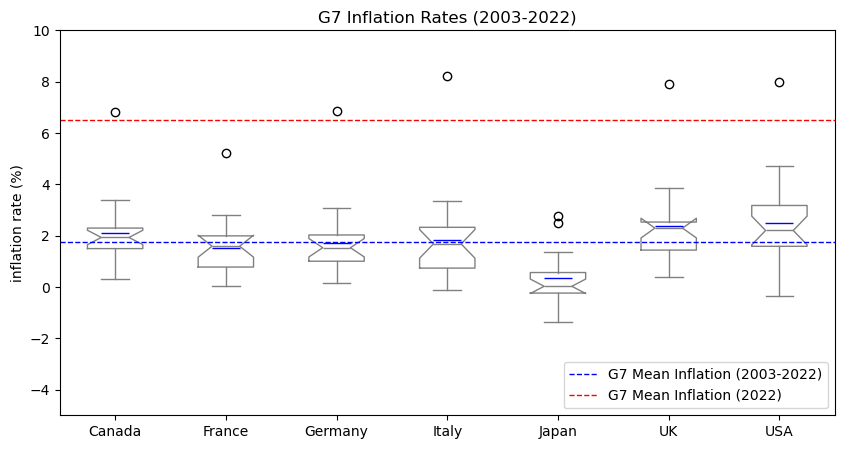

In [30]:
# create boxplot for 20 years of inflation
inflation_g7_df_no_lat_lon.plot.box(ylabel="inflation rate (%)",
    title="G7 Inflation Rates (2003-2022)",
    ylim=(-5,10),
    widths=.5,
    notch=1,
    patch_artist=False,
    color="gray",
    showmeans=True,
    meanprops=dict(
        marker="_",
        markersize=20,
        markeredgewidth=1,
        markeredgecolor="blue"
    )
    )

# get overall overage inflation rate (series)
mean_inflation = inflation_g7_df_no_lat_lon.stack().mean()

# add overall inflation line
plt.hlines(mean_inflation, xmin=0.5, xmax=len(inflation_g7_df_no_lat_lon.columns) + .5, color="blue", linestyles="--", linewidth=1, label="G7 Mean Inflation (2003-2022)")

# get average 2022 inflation rate
mean_inflation_2022 = inflation_g7_df_no_lat_lon.loc["2022",:].mean()

# add 2022 mean inflation line
plt.hlines(mean_inflation_2022, xmin=0.5, xmax=len(inflation_g7_df_no_lat_lon.columns) + .5, color="red", linestyles="--", linewidth=1, label="G7 Mean Inflation (2022)")

# change x labels to save space
plt.xticks([1,2,3,4,5,6,7], ["Canada", "France", "Germany", "Italy", "Japan", "UK", "USA"])

# add legend
plt.legend(loc="lower right")